### Predicting Chances of Admission for Graduate Programs in Universities.

### Our Objective:
* Determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.
* The predicted output gives them a fair idea about their admission chances in a particular university. 

### Getting to know the dataset!
GA dataset contains various paraameters which are important for admission into graduate programs in universities. The features included are :
* GRE Scores ( out of 340 ).
* TOEFL Scores ( out of 120 ).
* University Rating ( out of 5 ).
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 ).
* Undergraduate GPA ( out of 10 ).
* Research Experience ( either 0 or 1 ).
* Chance of Admit ( ranging from 0 to 1 ).

### Approach:
* Explore our data to check for imbalance and missing values.
* Explore the correlation between various features in the dataset.
* Split the preprocessed dataset into train and test sets respectively.
* Create and Train a AdaBoost Classifier using mlpack.
* We'll perform evaluation on our test set using metrics such as Accuracy, ROC AUC to quantify the performance of out model.

In [125]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlpack
from sklearn.metrics import *

In [126]:
%matplotlib inline
sns.set(color_codes=True)

### Load the data

In [ ]:
!wget -q http://datasets.mlpack.org/Admission_Predict.csv

In [127]:
# Load Graduate Admission dataset.
graduateData = pd.read_csv("Admission_Predict.csv")

### Explore the data

In [128]:
# Examine first 5 samples from our dataset.
graduateData.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [129]:
# Concise summary of all the features in the dataframe.
graduateData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


From the above summary statistic we can infer there is no categorical variables to be transformed in out dataset.

In [130]:
## Check the dataset for missing values.
graduateData.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

From the above output we can infer there are no missing values in any of the features of our dataset, so there is no need for imputation or resampling.

In [131]:
def PlotHeatMap(data, figWidth=8, figHeight=8):
    """
    Generates an heatmap to visualize the correlation between various features in the dataset.
    
        Parameter:
            data (DataFrame): Pandas dataframe to be ploted.
            figWidth (int): Width of the figure.
            figHeight (int): Height of the figure.
            
        Returns:
            None
    """
    plt.figure(figsize=(figWidth,figHeight))
    sns.heatmap(data.corr(), square=True, 
                annot=True, fmt=".2f")
    plt.show()

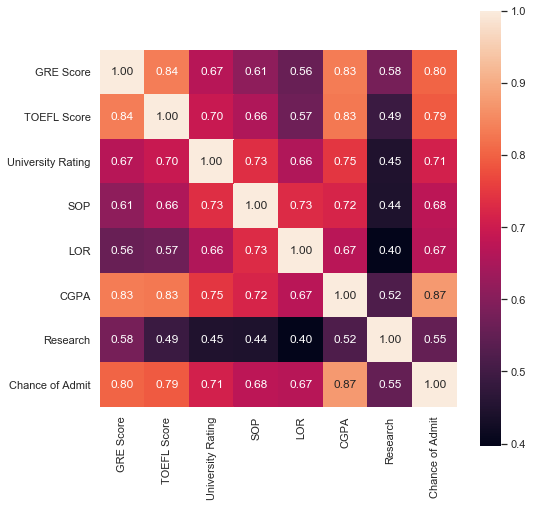

In [132]:
# Plot the correlation matrix as heatmap.
PlotHeatMap(graduateData)

As we can observe from the above heatmap, there is high correlation between the follwing features:
* Chance of Admit & GRE Score.
* Change of Admit & TOEFL Score.
* Chance of Admit & CGPA.
* GRE & TOEFL Score.

We can infer that these are really important for the chance of admit function as it varies almost about linearly with the mentioned factors.

### Exploratory Data Analysis
#### Univariate Analysis

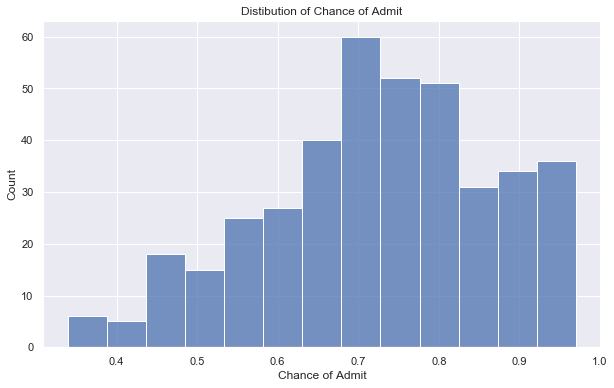

In [134]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x="Chance of Admit", data=graduateData)
ax.set_title("Distibution of Chance of Admit")
plt.show()

* Most of the students have above 70% chance of admit.
* More than 50% of students have above 72% chance of admit.

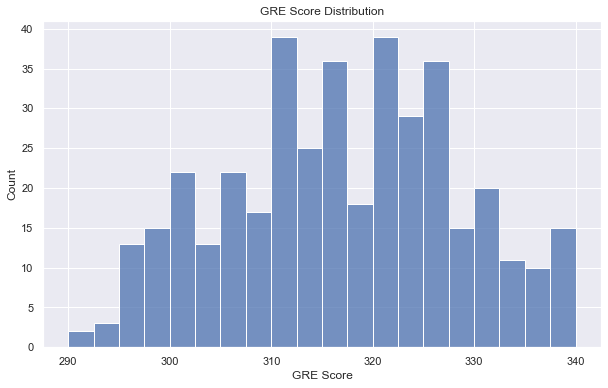

In [135]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x="GRE Score", bins=20, data=graduateData)
ax.set_title("GRE Score Distribution")
plt.show()

* Large Number of students have secured GRE score between 308 & 325.
* More than 50% of students scored more than 316 in GRE.

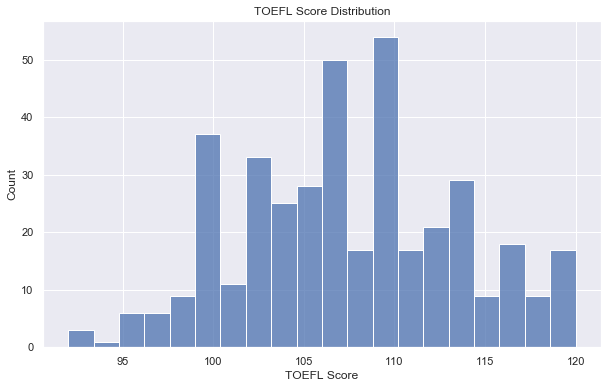

In [136]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x="TOEFL Score", bins=20, data=graduateData)
ax.set_title("TOEFL Score Distribution")
plt.show()

* Large number of students have scored between 103 & 112 in TOEFL.
* More than 50% of students scored more than 107 in TOEFL.

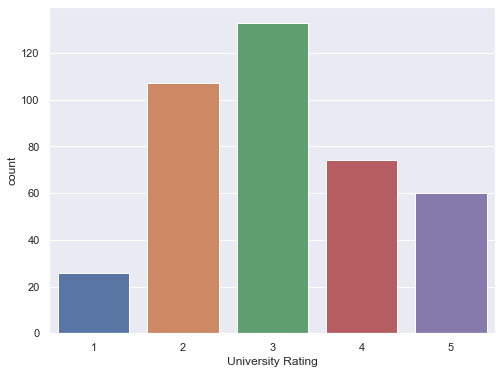

In [137]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="University Rating", data=graduateData)

* From the above plot we can infer that students from universities that have got a rating of 3 are more in number among those who have applied for MS program.
* More than 50% of universities have rating of 3 and above.

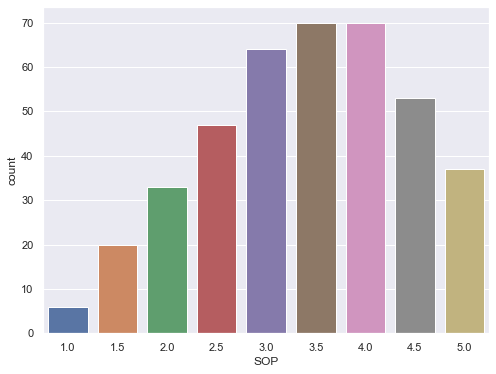

In [138]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="SOP", data=graduateData)

* From the above plot we can infer that students with SOP score of 4 are highest in number.
* Large number of students have SOP score ranging between 2.5 to 4.
* More than 50% of students have SOP scores of 3.5 and above.

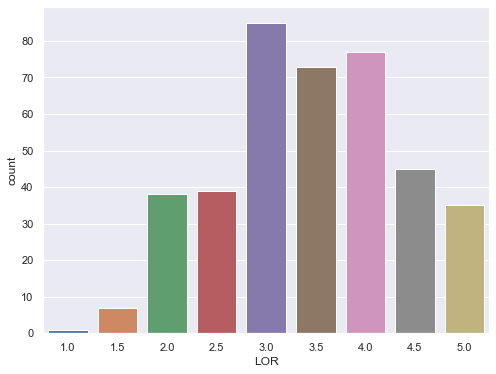

In [139]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="LOR", data=graduateData)

* From the above plot we can infer that the studetnts with LOR score of 3 are highest in number.
* Large number of students have LOR score ranging between 3 to 4.
* More than 50% of students have LOR scores of 3.5 and above.

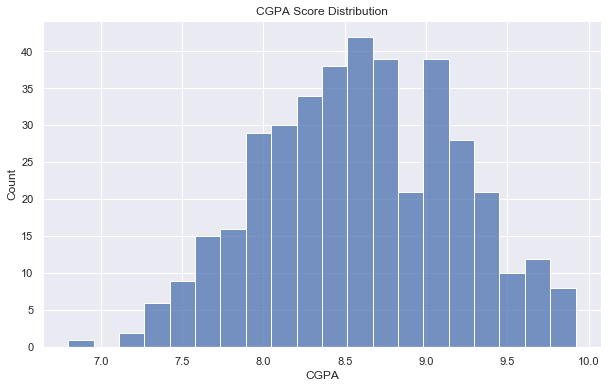

In [140]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x="CGPA", bins=20, data=graduateData)
ax.set_title("CGPA Score Distribution")
plt.show()

* Large number of students have secured CGPA between 8.0 & 9.0.
* More than 50% of students have CGPA of 8.5 and above.

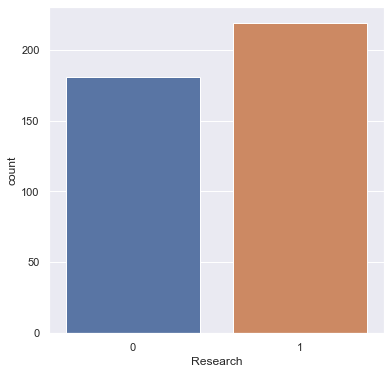

In [141]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Research", data=graduateData)

*  From the above fig we can infer most students did some kind of research.

#### Bivariate Analysis

<Figure size 1152x432 with 0 Axes>

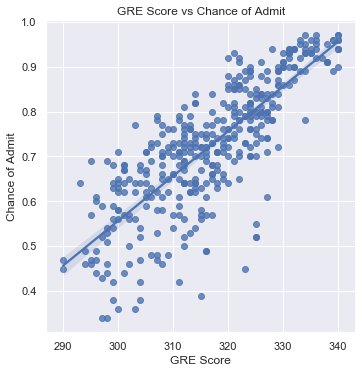

In [142]:
plt.figure(figsize=(16,6))
ax = sns.lmplot(x="GRE Score", y="Chance of Admit", data=graduateData)
plt.title("GRE Score vs Chance of Admit")
plt.show()

* Higher the GRE score, higher the chance of getting admit.
* From the above plot it is clear that most students tend to score above 310 in GRE. Maximum GRE scores are in range 320-340.

<Figure size 1152x432 with 0 Axes>

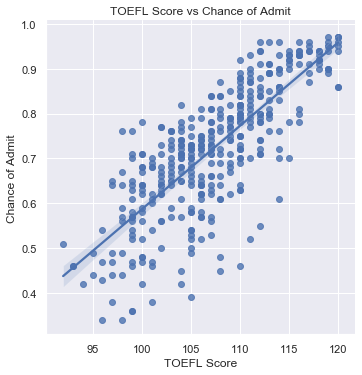

In [144]:
plt.figure(figsize=(16,6))
ax = sns.lmplot(x="TOEFL Score", y="Chance of Admit", data=graduateData)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

* High TOEFL score has a greater chance of getting admit.

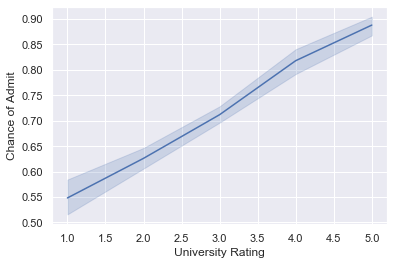

In [145]:
ax = sns.lineplot(x="University Rating", y="Chance of Admit", data=graduateData)
plt.show()

* Students from universitites rated 5 have a average of whopping 88.8% chances of admit whilst students from 1 rated universities have not a great value of 56.2 % chances.

<Figure size 432x432 with 0 Axes>

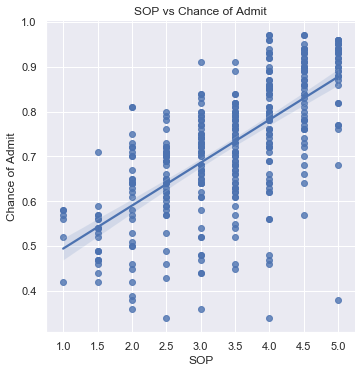

In [146]:
plt.figure(figsize=(6,6))
ax = sns.lmplot(x="SOP", y="Chance of Admit", data=graduateData)
plt.title("SOP vs Chance of Admit")
plt.show()

* Students who have secured higher score for their Statement of Purpose (SOP), have an upper hand in getting an admit. 

<Figure size 432x432 with 0 Axes>

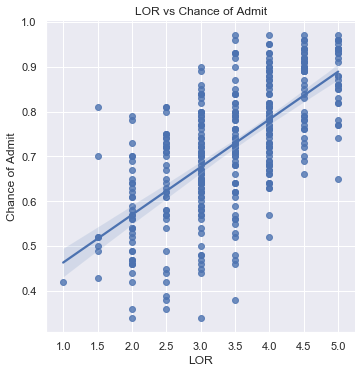

In [148]:
plt.figure(figsize=(6,6))
ax = sns.lmplot(x="LOR", y="Chance of Admit", data=graduateData)
plt.title("LOR vs Chance of Admit")
plt.show()

* Students who have secured higher score for their Letter of Recommendation (LOR), have an upper hand in getting an admit.

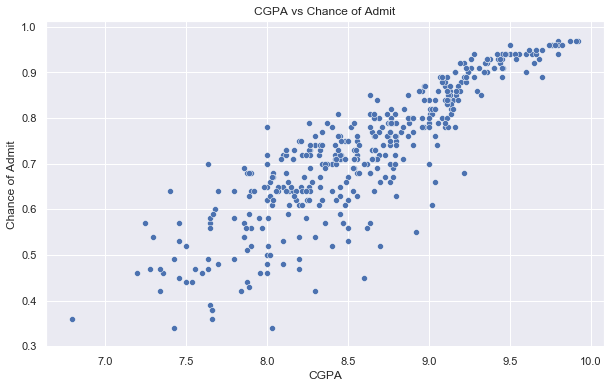

In [149]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="CGPA", y="Chance of Admit", data=graduateData)
ax.set_title("CGPA vs Chance of Admit")
plt.show()

* Students with high CGPA are likely to get more chance of admit than those who scored low CGPA.

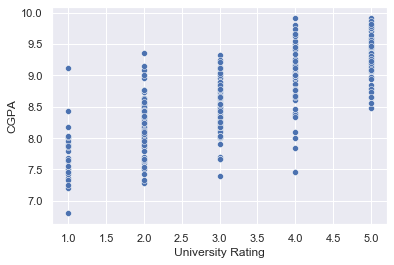

In [150]:
sns.scatterplot(x="University Rating", y="CGPA", data=graduateData)

Ratings of university increase with the increase in the CGPA.

In [151]:
co_gre = graduateData[graduateData["GRE Score"] >= 300]
co_toefl = graduateData[graduateData["TOEFL Score"] >= 100]

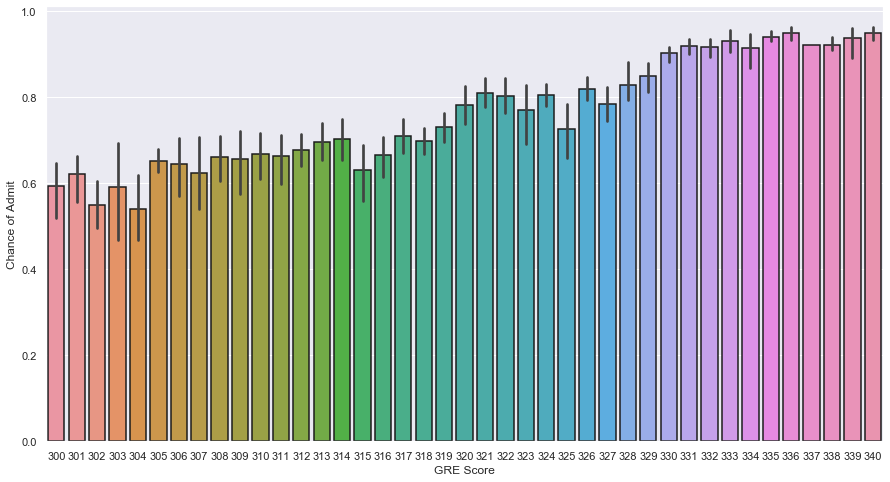

In [152]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="GRE Score", y="Chance of Admit", data=co_gre, linewidth=1.5, edgecolor="0.1")

From the above plot it is clear that higher the GRE Score better is the chance of admit.

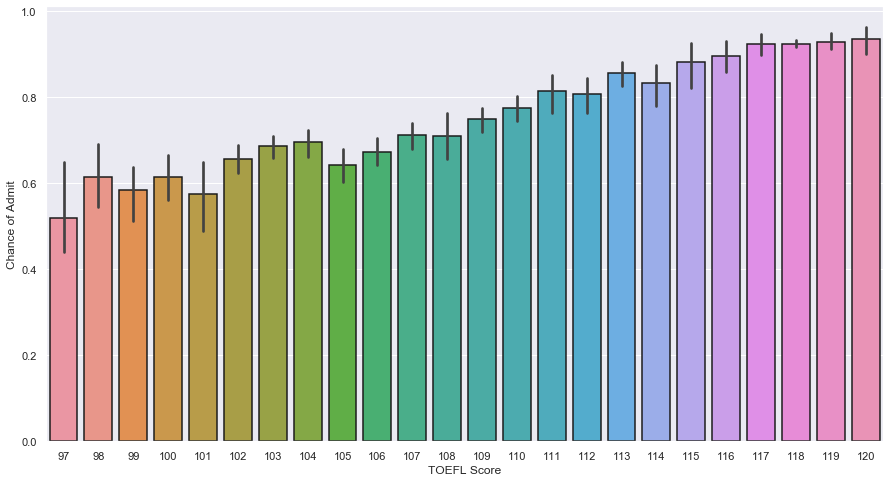

In [153]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="TOEFL Score", y="Chance of Admit", data=co_gre, linewidth=1.5, edgecolor="0.1")

From the above plot it is clear that higher the TOEFL Score better the chance of admit.

In [154]:
def FeatureTargetSplit(data, admitThresh=0.8):
    """
    Returns the Features of interest and targets.
        
        Parameter:
            data (DataFrame): Pandas dataframe which is to be splited into features and targets.
            admitThresh (double): cutoff for admission in graduate program, default: 0.8.
        
        Returns:
            features (DataFrame): Pandas dataframe consisting of the features.
            target (DataFrame): Pandas dataframe containing the target.
    """
    features = graduateData.drop("Chance of Admit", axis=1)
    targets = graduateData["Chance of Admit"]
    targets = targets.apply(lambda x: 1 if x > admitThresh else 0)
    return features, targets

In [156]:
print(f"Average GRE Score: {graduateData['GRE Score'].mean() :.2f} out of 340")
print(f"Average TOEFL Score: {graduateData['TOEFL Score'].mean() :.2f} out of 120")
print(f"Average CGPA: {graduateData['CGPA'].mean() :.2f} out of 10")
print(f"Average chance of getting admitted: {graduateData['Chance of Admit'].mean() * 100}")

Average GRE Score: 316.81 out of 340
Average TOEFL Score: 107.41 out of 120
Average CGPA: 8.60 out of 10
Average chance of getting admitted: 72.435


In [157]:
features, targets = FeatureTargetSplit(graduateData)

In [160]:
def TrainTestSplit(features, target, test_ratio=0.2, standardize=False):
    """
    Splits the features & target into respective training and test set based on the test ratio.
    
        Parameter:
            features (DataFrame): Pandas dataframe containing the features.
            target (DataFrame): Pandas dataframe containing the targets.
            test_ratio (double): Percentage of dataset to be hold out for test set. default 20%.
            standardize (bool): if True, features are scaled, default False.
            
        Returns:
            Xtrain (DataFrame): Pandas dataframe containing training features.
            Xtest (DataFrame): Pandas dataframe containing test features.
            ytrain (DataFrame): Pandas dataframe containing training targets.
            ytest (DataFrame): Pandas dataframe containing test targets.
    """
    train_len = len(features)
    train_idxs = list(range(train_len))
    np.random.shuffle(train_idxs)
    split = int(np.floor(test_ratio * train_len))
    Xtest = features.iloc[train_idxs[:split], :].values
    Xtrain = features.iloc[train_idxs[split:], :].values
    ytest = target.iloc[train_idxs[:split]].values
    ytrain = target.iloc[train_idxs[split:]].values
    if standardize:
        # Normalize Features.
        Xtrain = StandardScaler(Xtrain)
        Xtest = StandardScaler(Xtest)
    return Xtrain, Xtest, ytrain, ytest

### Train Test Split
The dataset has to be split into training and test set. Here the dataset has 400 observations and the test ratio is taken as 25% of the total observations. This indicates that the test set should have 25% * 400 = 100 observations and training set should have 300 observations respectively.

In [174]:
Xtrain, Xtest, ytrain, ytest = TrainTestSplit(features, targets, 0.25)

### Training the AdaBoost Classifier model
* Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking)
* AdaBoost is a boosting approach to machine learning based on the idea of creating a highly accurate prediction rule by combining many relatively weak an inaccurate rules.

In [175]:
# Create and train AdaBoost model with DecisionStump as weak learner.
model = mlpack.Adaboost(weak_learner='decision_stump')

In [176]:
output_model = model.fit(training=Xtrain, labels=ytrain)

### Making Predictions on Test set

In [177]:
# Predict the values for test data using previously trained model as input.
output_predictions = model.predict(test=Xtest)

In [178]:
yPreds = output_predictions.reshape(-1, 1).squeeze()
probabilities = model.predict_proba(test=Xtest)

In [179]:
def PlotRocAUC(fper, tper):
    """
    Generates an ROC AUC curve for the give True Positive Rate and False Positive Rate.
    
            Parameter:
                fper (np.ndarray): Contains the false positive rate.
                tper (np.ndarray): Contains the true positive rate.
            
            Returns:
                None
    """
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
def modelEval(ytest, yPreds):
    print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
    print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
    print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
    print(classification_report(ytest,yPreds))
    fper, tper, thresh = roc_curve(ytest, probabilities[:, 1])
    PlotRocAUC(fper, tper)

### Model Evaluation

Accuracy: 0.88
ROC AUC: 0.8948412698412699
Cohen's Kappa: 0.7262773722627738
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        72
           1       0.72      0.93      0.81        28

    accuracy                           0.88       100
   macro avg       0.85      0.89      0.86       100
weighted avg       0.90      0.88      0.88       100



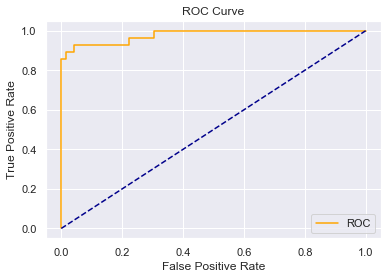

In [180]:
modelEval(ytest, yPreds)

### Conclusion
From the above ROC AUC curve, we can infer that out AdaBoost model performs well on predicting student admissions. There is still room for improvement. Feel free to play around with the hyperparameters, split ratio, admission threshold etc.